#                Poker Hand Classification - Machine Learning

### Loading the Data and finding the Data Samples class count

In [156]:
import pandas as pd

# Load the Poker Hand training dataset
training_data = pd.read_csv('poker-hand-training-true.csv', encoding='ISO-8859-1', header=None)
training_data.columns = ['Suit-of-First-card', 'Rank-of-First-Card', 'Suit-of-Second-card', 'Rank-of-Second-Card',
                         'Suit-of-Third-card', 'Rank-of-Third-Card', 'Suit-of-Fourth-card', 'Rank-of-Fourth-Card',
                         'Suit-of-Fifth-card', 'Rank-of-Fifth-Card', 'Poker-Hand-Training']

# Load the Poker Hand testing dataset
testing_data = pd.read_csv('poker-hand-testing.csv', encoding='ISO-8859-1', header=None)
testing_data.columns = ['Suit-of-First-card', 'Rank-of-First-Card', 'Suit-of-Second-card', 'Rank-of-Second-Card',
                        'Suit-of-Third-card', 'Rank-of-Third-Card', 'Suit-of-Fourth-card', 'Rank-of-Fourth-Card',
                        'Suit-of-Fifth-card', 'Rank-of-Fifth-Card', 'Poker-Hand-Testing']

# Define class label names
class_names = {
    0: '0: Nothing in hand',
    1: '1: One pair',
    2: '2: Two pairs',
    3: '3: Three of a kind',
    4: '4: Straight',
    5: '5: Flush',
    6: '6: Full house',
    7: '7: Four of a kind',
    8: '8: Straight flush',
    9: '9: Royal flush'
}

# Assign class label names in the training dataset
training_data['Poker-Hand-Training'] = training_data['Poker-Hand-Training'].map(class_names)

# Assign class label names in the testing dataset
testing_data['Poker-Hand-Testing'] = testing_data['Poker-Hand-Testing'].map(class_names)

# Count the class rows in the training dataset
training_class_counts = training_data['Poker-Hand-Training'].value_counts()

# Count the class rows in the testing dataset
testing_class_counts = testing_data['Poker-Hand-Testing'].value_counts()

# Print the count of classes in the training dataset
print("Training Dataset Class Counts:\n")
print(training_class_counts)

# Print the count of classes in the testing dataset
print("\nTesting Dataset Class Counts:\n")
print(testing_class_counts)

# Calculate and print the overall class count for the training dataset
overall_training_class_count = training_class_counts.sum()
print("\nOverall Training Dataset Class Count:", overall_training_class_count,"\n")

# Calculate and print the overall class count for the testing dataset
overall_testing_class_count = testing_class_counts.sum()
print("Overall Testing Dataset Class Count:", overall_testing_class_count)


Training Dataset Class Counts:

0: Nothing in hand    12493
1: One pair           10599
2: Two pairs           1206
3: Three of a kind      513
4: Straight              93
5: Flush                 54
6: Full house            36
7: Four of a kind         6
9: Royal flush            5
8: Straight flush         5
Name: Poker-Hand-Training, dtype: int64

Testing Dataset Class Counts:

0: Nothing in hand    501209
1: One pair           422498
2: Two pairs           47622
3: Three of a kind     21121
4: Straight             3885
5: Flush                1996
6: Full house           1424
7: Four of a kind        230
8: Straight flush         12
9: Royal flush             3
Name: Poker-Hand-Testing, dtype: int64

Overall Training Dataset Class Count: 25010 

Overall Testing Dataset Class Count: 1000000


### Cleaning the data sets

In [157]:
# Find missing values in the dataset
missing_values_train = training_data.isnull().sum()
missing_values_test = testing_data.isnull().sum()
# Print the count of missing values
print("Missing Values in Training set:")
print(missing_values_train)
print("Missing Values in Testing set:")
print(missing_values_train)

# Remove rows with missing values
Training_data_cleaned = training_data.dropna()
Testing_data_cleaned = testing_data.dropna()
# Print the cleaned dataset
print("\nCleaned_Training_Data:")
print(Training_data_cleaned)
print("\nCleaned_Testing_Data:")
print(Testing_data_cleaned)

Missing Values in Training set:
Suit-of-First-card     0
Rank-of-First-Card     0
Suit-of-Second-card    0
Rank-of-Second-Card    0
Suit-of-Third-card     0
Rank-of-Third-Card     0
Suit-of-Fourth-card    0
Rank-of-Fourth-Card    0
Suit-of-Fifth-card     0
Rank-of-Fifth-Card     0
Poker-Hand-Training    0
dtype: int64
Missing Values in Testing set:
Suit-of-First-card     0
Rank-of-First-Card     0
Suit-of-Second-card    0
Rank-of-Second-Card    0
Suit-of-Third-card     0
Rank-of-Third-Card     0
Suit-of-Fourth-card    0
Rank-of-Fourth-Card    0
Suit-of-Fifth-card     0
Rank-of-Fifth-Card     0
Poker-Hand-Training    0
dtype: int64

Cleaned_Training_Data:
       Suit-of-First-card  Rank-of-First-Card  Suit-of-Second-card  \
0                       1                  10                    1   
1                       2                  11                    2   
2                       3                  12                    3   
3                       4                  10            

### Determining whether the data sets are imbalanced or not

In [158]:
# Calculate the class proportions for the training dataset
training_class_proportions = (training_class_counts / len(training_data))*100

# Calculate the class proportions for the testing dataset
testing_class_proportions = (testing_class_counts / len(testing_data))*100

# Print the class proportions in the training dataset
print("Training Dataset Class Proportions:\n")
print(training_class_proportions)

# Check if the training dataset is imbalanced
if any(training_class_proportions < 5):
    print("\nTraining Dataset is imbalanced.")

# Print the class proportions in the testing dataset
print("\nTesting Dataset Class Proportions:\n")
print(testing_class_proportions)

# Check if the testing dataset is imbalanced
if any(testing_class_proportions < 5):
    print("Testing Dataset is imbalanced.")

Training Dataset Class Proportions:

0: Nothing in hand    49.952019
1: One pair           42.379048
2: Two pairs           4.822071
3: Three of a kind     2.051180
4: Straight            0.371851
5: Flush               0.215914
6: Full house          0.143942
7: Four of a kind      0.023990
9: Royal flush         0.019992
8: Straight flush      0.019992
Name: Poker-Hand-Training, dtype: float64

Training Dataset is imbalanced.

Testing Dataset Class Proportions:

0: Nothing in hand    50.1209
1: One pair           42.2498
2: Two pairs           4.7622
3: Three of a kind     2.1121
4: Straight            0.3885
5: Flush               0.1996
6: Full house          0.1424
7: Four of a kind      0.0230
8: Straight flush      0.0012
9: Royal flush         0.0003
Name: Poker-Hand-Testing, dtype: float64
Testing Dataset is imbalanced.


### Preparing, Splitting and Stratifying the data sets

In [159]:
from sklearn.model_selection import train_test_split

# Prepare the Training data
X_training = training_data.iloc[:, :-1]
y_training = training_data.iloc[:, -1]

# Prepare the Testing data
X_testing = testing_data.iloc[:, :-1]
y_testing = testing_data.iloc[:, -1]


# Shuffle and stratify the training dataset before splitting
X_train, X_valid_train, y_train, y_valid_train = train_test_split(X_training, y_training, 
                                                                  test_size=0.2, random_state=42, 
                                                                  stratify=y_training, shuffle=True)

# Shuffle and stratify the testing dataset before splitting
X_test, X_valid_test, y_test, y_valid_test = train_test_split(X_testing, y_testing, 
                                                              test_size=0.2, random_state=42, 
                                                              stratify=y_testing, shuffle=True)

# Print the counts of classes in the shuffled and stratified training dataset
training_class_counts = y_train.value_counts()
print("Training Dataset Class Counts (Shuffled and Stratified):\n")
print(training_class_counts)

# Print the counts of classes in the shuffled and stratified testing dataset
testing_class_counts = y_test.value_counts()
print("\nTesting Dataset Class Counts (Shuffled and Stratified):\n")
print(testing_class_counts)


# Print the counts of classes in the shuffled and stratified training dataset
training_validation_class_counts = y_valid_train.value_counts()
print("\nTraining Validation Dataset Class Counts (Shuffled and Stratified):\n")
print(training_validation_class_counts)

# Print the counts of classes in the shuffled and stratified testing dataset
testing_validation_class_counts = y_valid_test.value_counts()
print("\nTesting Validation Dataset Class Counts (Shuffled and Stratified):\n")
print(testing_validation_class_counts)

Training Dataset Class Counts (Shuffled and Stratified):

0: Nothing in hand    9994
1: One pair           8479
2: Two pairs           965
3: Three of a kind     411
4: Straight             74
5: Flush                43
6: Full house           29
7: Four of a kind        5
9: Royal flush           4
8: Straight flush        4
Name: Poker-Hand-Training, dtype: int64

Testing Dataset Class Counts (Shuffled and Stratified):

0: Nothing in hand    400967
1: One pair           337998
2: Two pairs           38098
3: Three of a kind     16897
4: Straight             3108
5: Flush                1597
6: Full house           1139
7: Four of a kind        184
8: Straight flush         10
9: Royal flush             2
Name: Poker-Hand-Testing, dtype: int64

Training Validation Dataset Class Counts (Shuffled and Stratified):

0: Nothing in hand    2499
1: One pair           2120
2: Two pairs           241
3: Three of a kind     102
4: Straight             19
5: Flush                11
6: Full house

### MLP Classification Report for Training set (25k Samples)

In [176]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize the MLP classifier with 2 hidden layers of 10 neurons each
classifier_training = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', 
                                    random_state=42)

# Train the MLP classifier
classifier_training.fit(X_training, y_training)

# Generate predictions on the training data
y_train_pred = classifier_training.predict(X_training)
# Generate classification report
Testing_report = classification_report(y_training, y_train_pred,zero_division=0)
print('MLP Classification Report for Training:')
print(Testing_report)


MLP Classification Report for Training:
                    precision    recall  f1-score   support

0: Nothing in hand       0.59      0.72      0.65     12493
       1: One pair       0.52      0.48      0.50     10599
      2: Two pairs       0.00      0.00      0.00      1206
3: Three of a kind       0.50      0.00      0.00       513
       4: Straight       0.00      0.00      0.00        93
          5: Flush       0.00      0.00      0.00        54
     6: Full house       0.00      0.00      0.00        36
 7: Four of a kind       0.00      0.00      0.00         6
 8: Straight flush       0.00      0.00      0.00         5
    9: Royal flush       0.00      0.00      0.00         5

          accuracy                           0.56     25010
         macro avg       0.16      0.12      0.11     25010
      weighted avg       0.52      0.56      0.53     25010



### MLP Classification Report for 20% validation set   (5k Samples)

In [172]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize the MLP classifier with 2 hidden layers of 10 neurons each
classifier_testing = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', 
                                   solver='adam', random_state=42)

# Train the MLP classifier
classifier_testing.fit(X_train, y_train)

# Generate predictions on the training data
y_test_pred = classifier_testing.predict(X_valid_train)
# Generate classification report
Testing_report = classification_report(y_valid_train, y_test_pred,zero_division=0)
print('MLP Classification Report for Testing:')
print(Testing_report)

/Users/kpr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classification Report for Testing:
                    precision    recall  f1-score   support

0: Nothing in hand       0.61      0.72      0.66      2499
       1: One pair       0.53      0.51      0.52      2120
      2: Two pairs       0.00      0.00      0.00       241
3: Three of a kind       0.00      0.00      0.00       102
       4: Straight       0.00      0.00      0.00        19
          5: Flush       0.00      0.00      0.00        11
     6: Full house       0.00      0.00      0.00         7
 7: Four of a kind       0.00      0.00      0.00         1
 8: Straight flush       0.00      0.00      0.00         1
    9: Royal flush       0.00      0.00      0.00         1

          accuracy                           0.57      5002
         macro avg       0.11      0.12      0.12      5002
      weighted avg       0.53      0.57      0.55      5002



### MLP classifier with 2 hidden layers (10,10) for testing set (1 million) using training set(25k)

In [153]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the data
X_training_scaled = scaler.fit_transform(X_training)

# Shuffle and stratify the training dataset before splitting
X_train, X_valid_train, y_train, y_valid_train = train_test_split(X_training_scaled, y_training, 
                                                                  test_size=0.2, random_state=42, 
                                                                  stratify=y_training, shuffle=True)

# Initialize the MLP classifier with 2 hidden layers of 10 neurons each
classifier_training = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', 
                                    random_state=42)

# Train the MLP classifier
classifier_training.fit(X_training, y_training)

# Generate predictions on the training data
y_train_pred = classifier_training.predict(X_testing)
# Generate classification report
Training_report = classification_report(y_testing, y_train_pred,zero_division=0)

print('MLP Classification Report for Training:/n')
print(Training_report)


MLP Classification Report for Training:/n
                    precision    recall  f1-score   support

0: Nothing in hand       0.58      0.71      0.64    501209
       1: One pair       0.51      0.46      0.48    422498
      2: Two pairs       0.00      0.00      0.00     47622
3: Three of a kind       0.68      0.00      0.00     21121
       4: Straight       0.00      0.00      0.00      3885
          5: Flush       0.00      0.00      0.00      1996
     6: Full house       0.00      0.00      0.00      1424
 7: Four of a kind       0.00      0.00      0.00       230
 8: Straight flush       0.00      0.00      0.00        12
    9: Royal flush       0.00      0.00      0.00         3

          accuracy                           0.55   1000000
         macro avg       0.18      0.12      0.11   1000000
      weighted avg       0.52      0.55      0.53   1000000



### Comparing Accuracy for each class vs samples using scatter plot (Training Set)

/Users/kpr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


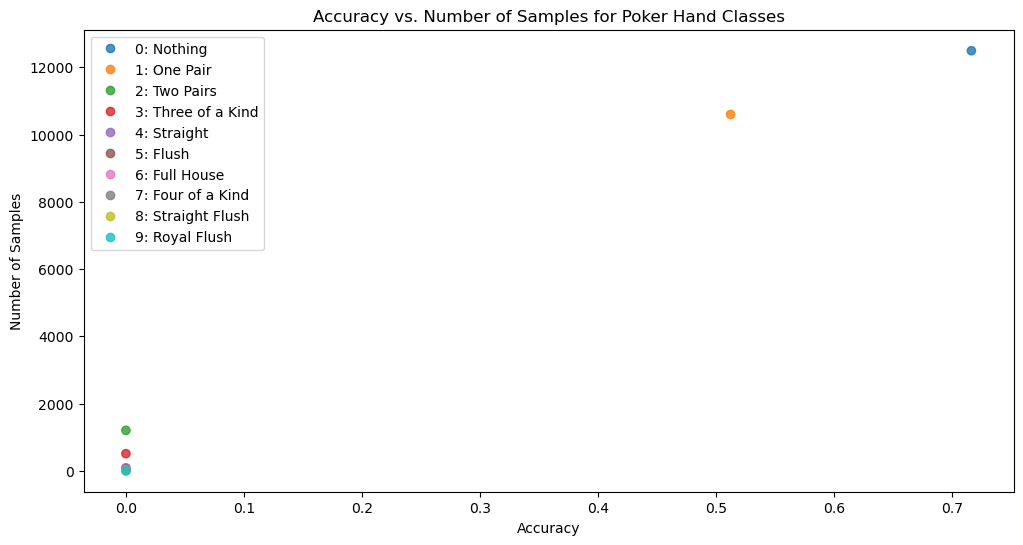

In [173]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of samples per class in the training dataset
class_counts = y_training.value_counts().sort_index()

# Train the MLP classifier
classifier_training.fit(X_train, y_train)

# Generate predictions on the training data
y_train_pred = classifier_training.predict(X_valid_train)

# Calculate accuracy for each class
class_accuracy = {}
for class_label in class_counts.index.tolist():
    y_valid_train_true_class = y_valid_train[y_valid_train == class_label]
    y_train_pred_class = y_train_pred[y_valid_train == class_label]
    if len(y_valid_train_true_class) > 0:
        class_accuracy[class_label] = accuracy_score(y_valid_train_true_class, y_train_pred_class)
    else:
        class_accuracy[class_label] = 0.0

# Generate a color map for each class
num_classes = len(class_counts)
color_map = plt.get_cmap('tab10')

# Plot the scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(list(class_accuracy.values()), class_counts, c=np.arange(num_classes),
                      cmap=color_map, alpha=0.8)

# Add labels to the colors
class_names = ['0: Nothing', '1: One Pair', '2: Two Pairs', '3: Three of a Kind', '4: Straight',
               '5: Flush', '6: Full House', '7: Four of a Kind', '8: Straight Flush', '9: Royal Flush']
plt.legend(handles=scatter.legend_elements()[0], labels=class_names, loc='upper left')

plt.xlabel('Accuracy')
plt.ylabel('Number of Samples')
plt.title('Accuracy vs. Number of Samples for Poker Hand Classes')

plt.show()


### Creating Confusion Matrix for Validation set (20%)

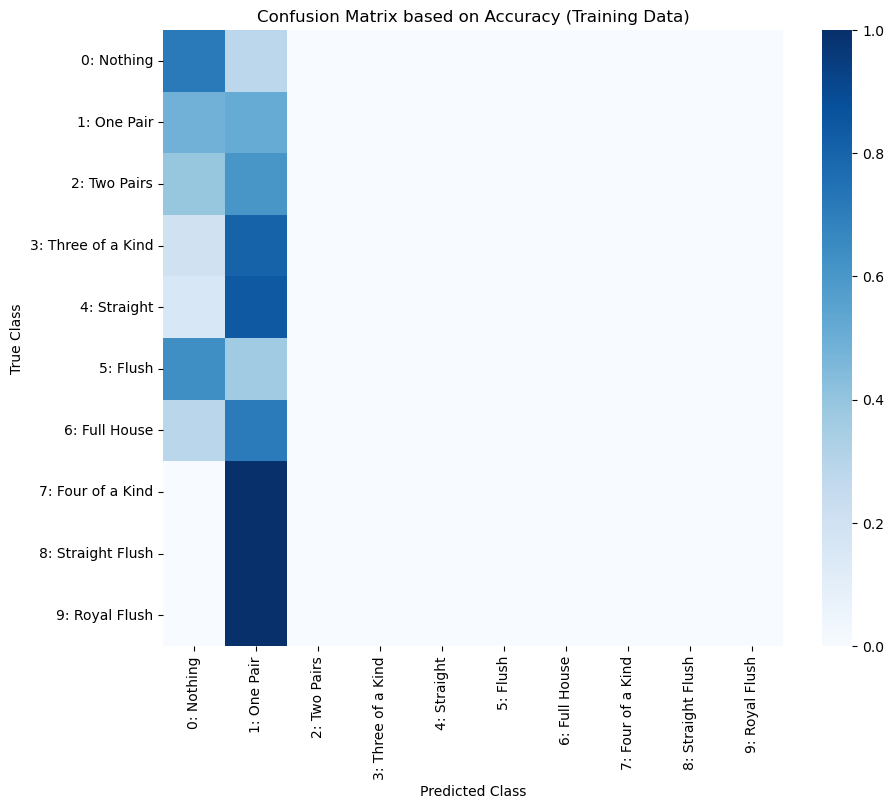

In [174]:
import seaborn as sns
from sklearn.preprocessing import normalize

# Create the confusion matrix
conf_matrix_train = confusion_matrix(y_valid_train, y_train_pred)

# Calculate the accuracy for each class
# class_accuracy_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Normalize the confusion matrices
norm_conf_matrix_train_mlp = normalize(conf_matrix_train, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_train_mlp, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Training Data)')
plt.show()

### confusion matrix for testing set (1 million) using validation set

/Users/kpr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


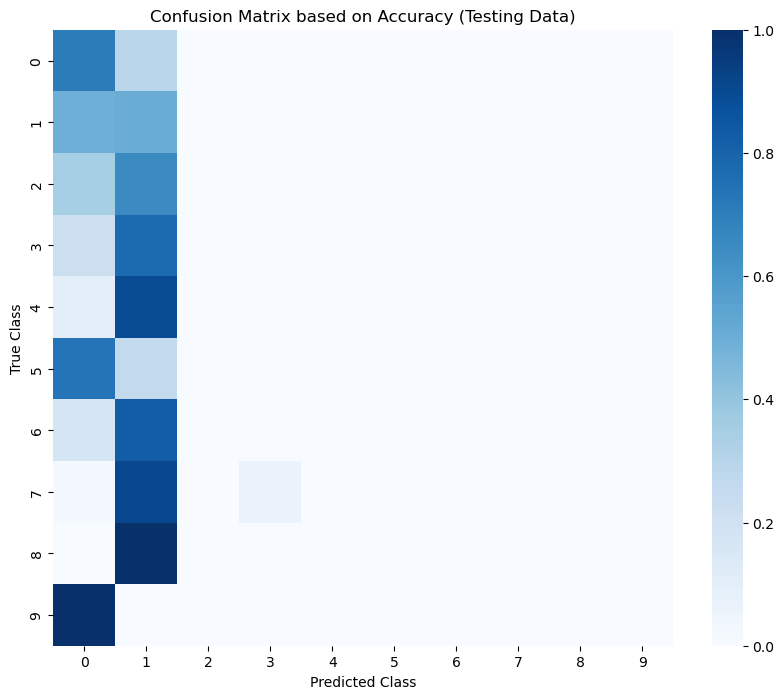

In [161]:
# Calculate the number of samples per class in the training dataset
class_counts = y_training.value_counts().sort_index()

# Train the MLP classifier
classifier_training.fit(X_train, y_train)

# Generate predictions on the training data
y_test_pred_test = classifier_training.predict(X_testing)

# Create the confusion matrix
conf_matrix_test = confusion_matrix(y_testing, y_test_pred_test)

# Calculate the accuracy for each class
# class_accuracy_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Normalize the confusion matrices
norm_conf_matrix_test_mlp = normalize(conf_matrix_test, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_test_mlp, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Testing Data)')
plt.show()

### Transforming Data sets

In [146]:
from sklearn.preprocessing import LabelEncoder
# Define the mapping for ranks and suits
rank_mapping = {1: 'Ace', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 
                8: 'Eight', 9: 'Nine', 10: 'Ten', 11: 'Jack', 12: 'Queen', 13: 'King'}
suit_mapping = {1: 'Hearts', 2: 'Spades', 3: 'Diamonds', 4: 'Clubs'}

# Transform the dataset
transformed_training_data = pd.DataFrame()
transformed_testing_data = pd.DataFrame()

# Transform ranks
for i in range(1, 14):
    transformed_training_data['Rank ' + str(i)] = (training_data.iloc[:, [1, 3, 5, 7, 9]] == i).sum(axis=1)

# Transform suits
for i in range(1, 5):
    transformed_training_data['Suite ' + str(i + 13)] = (training_data.iloc[:, [0, 2, 4, 6, 8]] == i).sum(axis=1)
    
# Transform ranks
for i in range(1, 14):
    transformed_testing_data['Rank ' + str(i)] = (testing_data.iloc[:, [1, 3, 5, 7, 9]] == i).sum(axis=1)

# Transform suits
for i in range(1, 5):
    transformed_testing_data['Suite ' + str(i + 13)] = (testing_data.iloc[:, [0, 2, 4, 6, 8]] == i).sum(axis=1)

# Add the label column
transformed_training_data['Label'] = training_data.iloc[:, 10]
transformed_testing_data['Label'] = testing_data.iloc[:, 10]

# Print the first 5 rows of original data
print("Original Data (First 5 Rows):")
print(training_data.head(5))

# Print the first 5 rows of transformed data
print("\nTransformed Data (First 5 Rows):")
print(transformed_training_data.head(5))

# Print the first 5 rows of original data
print("Original Data (First 5 Rows):")
print(testing_data.head(5))

# Print the first 5 rows of transformed data
print("\nTransformed Data (First 5 Rows):")
print(transformed_testing_data.head(5))

X_transformed_training = transformed_training_data.iloc[:, :-1]
y_transformed_training = transformed_training_data.iloc[:, -1]

print (X_transformed_training.head(5))
print (y_transformed_training.head(5))


X_transformed_testing = transformed_testing_data.iloc[:, :-1]
y_transformed_testing = transformed_testing_data.iloc[:, -1]

print (X_transformed_testing.head(5))
print (y_transformed_testing.head(5))


Original Data (First 5 Rows):
   Suit-of-First-card  Rank-of-First-Card  Suit-of-Second-card  \
0                   1                  10                    1   
1                   2                  11                    2   
2                   3                  12                    3   
3                   4                  10                    4   
4                   4                   1                    4   

   Rank-of-Second-Card  Suit-of-Third-card  Rank-of-Third-Card  \
0                   11                   1                  13   
1                   13                   2                  10   
2                   11                   3                  13   
3                   11                   4                   1   
4                   13                   4                  12   

   Suit-of-Fourth-card  Rank-of-Fourth-Card  Suit-of-Fifth-card  \
0                    1                   12                   1   
1                    2                   1

## Randomly Choosing topology for comparision between original data and transformed data

#### single layer and 2 layer topology for original data

In [70]:
# MLP classifier with single layer of 100 neurons
classifier_original_single_layer = MLPClassifier(hidden_layer_sizes=(100,), 
                                                 activation='relu', solver='adam', random_state=42)

# Train the MLP classifier with original data
classifier_original_single_layer.fit(X_training, y_training)

# Generate predictions on the original data
y_original_single_layer_pred = classifier_original_single_layer.predict(X_training)

# Classification report for single layer with original data
classification_report_original_single_layer = classification_report(y_training, 
                                                                    y_original_single_layer_pred,
                                                                    zero_division=0)

# Print classification report for single layer with original data
print("Classification Report - Single Layer with Original Data:")
print(classification_report_original_single_layer)

# MLP classifier with two layers of 10 neurons each
classifier_original_two_layers = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', 
                                               solver='adam', random_state=42)

# Train the MLP classifier with original data
classifier_original_two_layers.fit(X_training, y_training)

# Generate predictions on the original data
y_original_two_layers_pred = classifier_original_two_layers.predict(X_training)

# Classification report for two layers with original data
classification_report_original_two_layers = classification_report(y_training, 
                                                                  y_original_two_layers_pred, zero_division=0)

# Print classification report for two layers with original data
print("Classification Report - Two Layers with Original Data:")
print(classification_report_original_two_layers)




/Users/kpr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report - Single Layer with Original Data:
                    precision    recall  f1-score   support

0: Nothing in hand       0.71      0.87      0.78     12493
       1: One pair       0.66      0.60      0.63     10599
      2: Two pairs       0.73      0.02      0.05      1206
3: Three of a kind       0.84      0.05      0.10       513
       4: Straight       0.00      0.00      0.00        93
          5: Flush       1.00      0.31      0.48        54
     6: Full house       0.00      0.00      0.00        36
 7: Four of a kind       1.00      0.83      0.91         6
 8: Straight flush       1.00      0.40      0.57         5
    9: Royal flush       1.00      1.00      1.00         5

          accuracy                           0.69     25010
         macro avg       0.69      0.41      0.45     25010
      weighted avg       0.69      0.69      0.66     25010

Classification Report - Two Layers with Original Data:
                    precision    recall  f1-s

### single layer and 2 layer topology for Transformed data for training set

Classification Report - Single Layer with Transformed Data:
                    precision    recall  f1-score   support

0: Nothing in hand       1.00      1.00      1.00     12493
       1: One pair       1.00      1.00      1.00     10599
      2: Two pairs       1.00      1.00      1.00      1206
3: Three of a kind       1.00      1.00      1.00       513
       4: Straight       1.00      1.00      1.00        93
          5: Flush       1.00      1.00      1.00        54
     6: Full house       1.00      1.00      1.00        36
 7: Four of a kind       1.00      1.00      1.00         6
 8: Straight flush       1.00      1.00      1.00         5
    9: Royal flush       1.00      1.00      1.00         5

          accuracy                           1.00     25010
         macro avg       1.00      1.00      1.00     25010
      weighted avg       1.00      1.00      1.00     25010



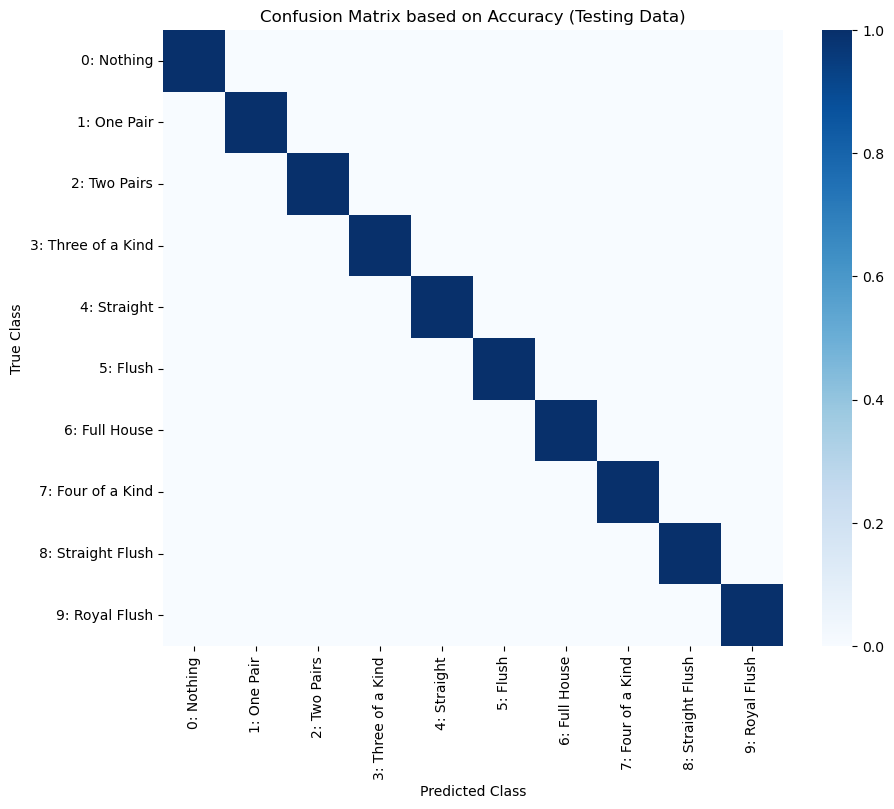

Classification Report - Two Layers with Transformed Data:
                    precision    recall  f1-score   support

0: Nothing in hand       1.00      1.00      1.00     12493
       1: One pair       1.00      1.00      1.00     10599
      2: Two pairs       1.00      1.00      1.00      1206
3: Three of a kind       1.00      1.00      1.00       513
       4: Straight       1.00      1.00      1.00        93
          5: Flush       1.00      1.00      1.00        54
     6: Full house       1.00      1.00      1.00        36
 7: Four of a kind       1.00      1.00      1.00         6
 8: Straight flush       1.00      1.00      1.00         5
    9: Royal flush       1.00      1.00      1.00         5

          accuracy                           1.00     25010
         macro avg       1.00      1.00      1.00     25010
      weighted avg       1.00      1.00      1.00     25010



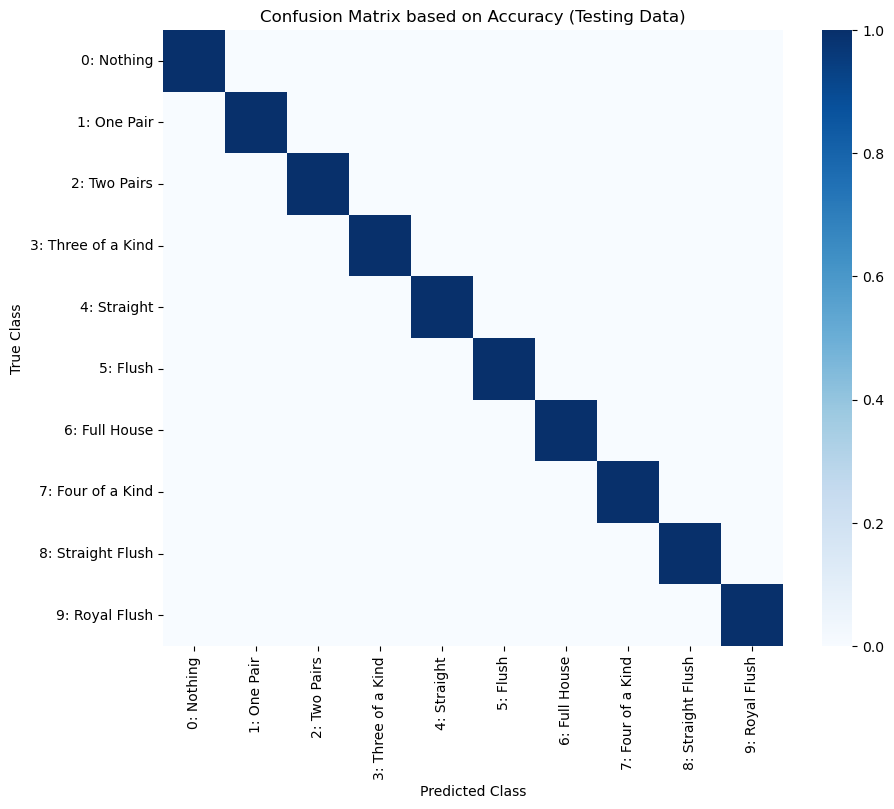

In [177]:
# Perform label encoding on the target labels
#label_encoder = LabelEncoder()
#y_training_encoded = label_encoder.fit_transform(transformed_training_data['Label'])

# Perform label encoding on the target labels
#label_encoder = LabelEncoder()
#y_training_encoded = label_encoder.fit_transform(transformed_training_data['Label'])

# Remove the label column from the transformed data
#transformed_training_data = transformed_training_data.drop(columns=['Label'])

# MLP classifier with single layer of 100 neurons
classifier_transformed_single_layer = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                                                    solver='adam', random_state=42)

# Train the MLP classifier with transformed data
classifier_transformed_single_layer.fit(X_transformed_training, y_transformed_training)

# Generate predictions on the transformed data
y_transformed_single_layer_pred = classifier_transformed_single_layer.predict(X_transformed_training)

# Classification report for single layer with transformed data
classification_report_transformed_single_layer = classification_report(y_transformed_training, 
                                                                       y_transformed_single_layer_pred,
                                                                       zero_division = 0)

# Print classification report for single layer with transformed data
print("Classification Report - Single Layer with Transformed Data:")
print(classification_report_transformed_single_layer)


# Create the confusion matrix
conf_matrix_transf_single = confusion_matrix(y_transformed_training, y_transformed_single_layer_pred)

# Normalize the confusion matrices
norm_conf_matrix_transf_single = normalize(conf_matrix_transf_single, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_transf_single, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Testing Data)')
plt.show()

# MLP classifier with two layers of 10 neurons each
classifier_transformed_two_layers = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', 
                                                  solver='adam', random_state=42)

# Train the MLP classifier with transformed data
classifier_transformed_two_layers.fit(X_transformed_training, y_transformed_training)

# Generate predictions on the transformed data
y_transformed_two_layers_pred = classifier_transformed_two_layers.predict(X_transformed_training)

# Classification report for two layers with transformed data
classification_report_transformed_two_layers = classification_report(y_transformed_training, 
                                                                     y_transformed_two_layers_pred, 
                                                                     zero_division = 0)

# Print classification report for two layers with transformed data
print("Classification Report - Two Layers with Transformed Data:")
print(classification_report_transformed_two_layers)

# Create the confusion matrix
conf_matrix_transf_two_layer = confusion_matrix(y_transformed_training, y_transformed_two_layers_pred)

# Normalize the confusion matrices
norm_conf_matrix_transf_two_layer = normalize(conf_matrix_transf_two_layer, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_transf_two_layer, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Testing Data)')
plt.show()



### single layer and 2 layer topology for Transformed data 

Classification Report - Single Layer with Transformed Data:
                    precision    recall  f1-score   support

0: Nothing in hand       1.00      1.00      1.00    501209
       1: One pair       1.00      1.00      1.00    422498
      2: Two pairs       1.00      0.99      0.99     47622
3: Three of a kind       0.94      0.99      0.96     21121
       4: Straight       0.98      1.00      0.99      3885
          5: Flush       0.99      0.76      0.86      1996
     6: Full house       0.92      0.28      0.43      1424
 7: Four of a kind       0.01      0.01      0.01       230
 8: Straight flush       0.05      0.42      0.09        12
    9: Royal flush       0.19      1.00      0.32         3

          accuracy                           1.00   1000000
         macro avg       0.71      0.74      0.67   1000000
      weighted avg       1.00      1.00      1.00   1000000



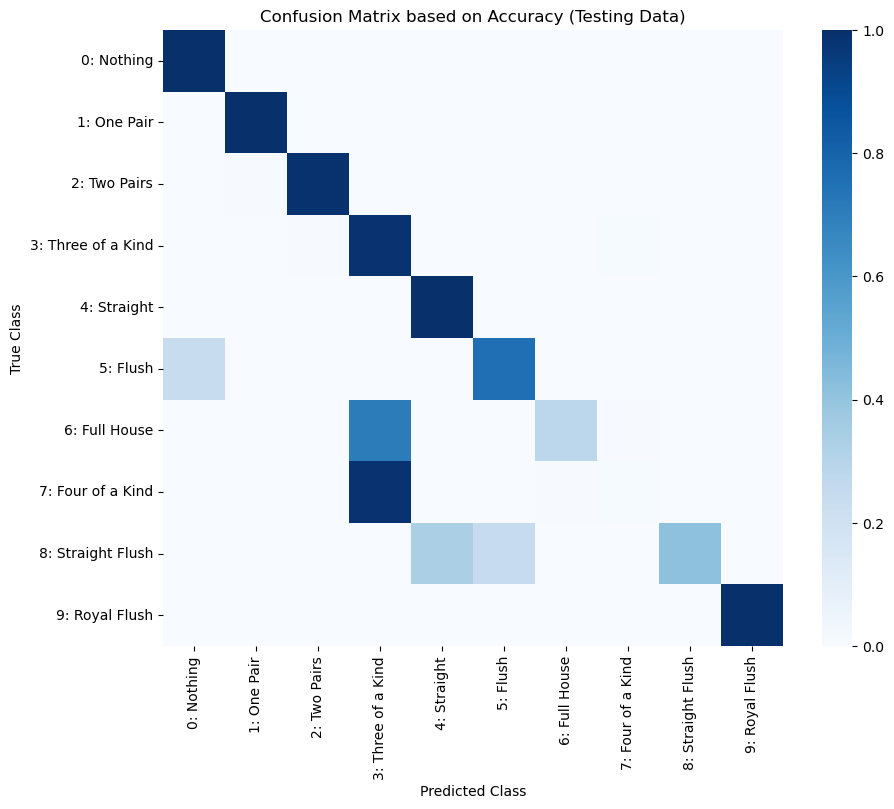

Classification Report - Two Layers with Transformed Data:
                    precision    recall  f1-score   support

0: Nothing in hand       1.00      1.00      1.00    501209
       1: One pair       1.00      1.00      1.00    422498
      2: Two pairs       1.00      1.00      1.00     47622
3: Three of a kind       0.97      1.00      0.98     21121
       4: Straight       1.00      1.00      1.00      3885
          5: Flush       0.95      0.48      0.64      1996
     6: Full house       0.88      0.55      0.68      1424
 7: Four of a kind       1.00      0.52      0.69       230
 8: Straight flush       0.62      0.42      0.50        12
    9: Royal flush       0.30      1.00      0.46         3

          accuracy                           1.00   1000000
         macro avg       0.87      0.80      0.79   1000000
      weighted avg       1.00      1.00      1.00   1000000



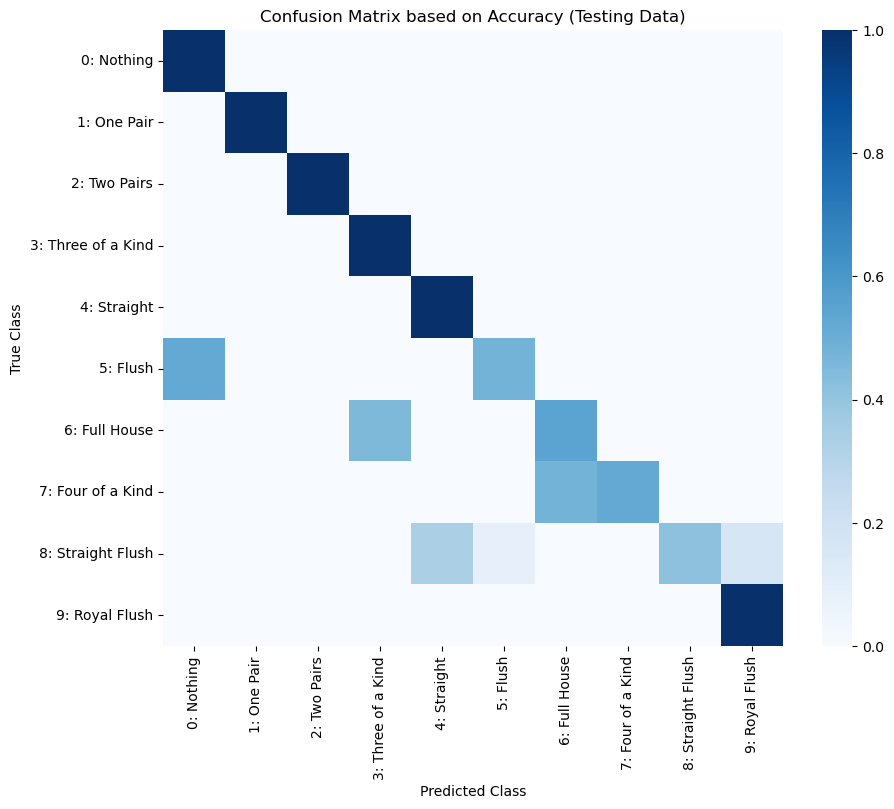

In [179]:
# Perform label encoding on the target labels
#label_encoder = LabelEncoder()
#y_training_encoded = label_encoder.fit_transform(transformed_training_data['Label'])

# Perform label encoding on the target labels
#label_encoder = LabelEncoder()
#y_training_encoded = label_encoder.fit_transform(transformed_training_data['Label'])

# Remove the label column from the transformed data
#transformed_training_data = transformed_training_data.drop(columns=['Label'])

# MLP classifier with single layer of 100 neurons
classifier_transformed_single_layer = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                                                    solver='adam', random_state=42)

# Train the MLP classifier with transformed data
classifier_transformed_single_layer.fit(X_transformed_training, y_transformed_training)

# Generate predictions on the transformed data
y_transformed_single_layer_pred = classifier_transformed_single_layer.predict(X_transformed_testing)

# Classification report for single layer with transformed data
classification_report_transformed_single_layer = classification_report(y_transformed_testing, 
                                                                       y_transformed_single_layer_pred,
                                                                       zero_division = 0)

# Print classification report for single layer with transformed data
print("Classification Report - Single Layer with Transformed Data:")
print(classification_report_transformed_single_layer)


# Create the confusion matrix
conf_matrix_transf_single = confusion_matrix(y_transformed_testing, y_transformed_single_layer_pred)

# Normalize the confusion matrices
norm_conf_matrix_transf_single = normalize(conf_matrix_transf_single, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_transf_single, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Testing Data)')
plt.show()

# MLP classifier with two layers of 10 neurons each
classifier_transformed_two_layers = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', 
                                                  solver='adam', random_state=42)

# Train the MLP classifier with transformed data
classifier_transformed_two_layers.fit(X_transformed_training, y_transformed_training)

# Generate predictions on the transformed data
y_transformed_two_layers_pred = classifier_transformed_two_layers.predict(X_transformed_testing)

# Classification report for two layers with transformed data
classification_report_transformed_two_layers = classification_report(y_transformed_testing, 
                                                                     y_transformed_two_layers_pred, 
                                                                     zero_division = 0)

# Print classification report for two layers with transformed data
print("Classification Report - Two Layers with Transformed Data:")
print(classification_report_transformed_two_layers)

# Create the confusion matrix
conf_matrix_transf_two_layer = confusion_matrix(y_transformed_testing, y_transformed_two_layers_pred)

# Normalize the confusion matrices
norm_conf_matrix_transf_two_layer = normalize(conf_matrix_transf_two_layer, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_transf_two_layer, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Testing Data)')
plt.show()



## Decission Trees

### Decission tree classification report default - Training Set

In [117]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with default parameters
classifier_DT_train = DecisionTreeClassifier()

# Train the classifier
classifier_DT_train.fit(X_training, y_training)

# Predict on the test data
y_pred_train_DT = classifier_DT_train.predict(X_training)

# Generate classification report
Classification_Train_report_DT = classification_report(y_training, y_pred_train_DT, zero_division = 0)
print(Classification_Train_report_DT)


                    precision    recall  f1-score   support

0: Nothing in hand       1.00      1.00      1.00     12493
       1: One pair       1.00      1.00      1.00     10599
      2: Two pairs       1.00      1.00      1.00      1206
3: Three of a kind       1.00      1.00      1.00       513
       4: Straight       1.00      1.00      1.00        93
          5: Flush       1.00      1.00      1.00        54
     6: Full house       1.00      1.00      1.00        36
 7: Four of a kind       1.00      1.00      1.00         6
 8: Straight flush       1.00      1.00      1.00         5
    9: Royal flush       1.00      1.00      1.00         5

          accuracy                           1.00     25010
         macro avg       1.00      1.00      1.00     25010
      weighted avg       1.00      1.00      1.00     25010



In [180]:
### Decission tree classification report manually fitting default values - Training Set

In [118]:
# Initialize the Decision Tree classifier with default parameters
classifier_Default_DT_Train = DecisionTreeClassifier(max_depth=None, 
                                                     min_samples_split=2, min_samples_leaf=1, 
                                                     class_weight='balanced', criterion='gini')

# Train the classifier
classifier_Default_DT_Train.fit(X_training, y_training)

# Predict on the test data
y_pred_default_train_DT = classifier_Default_DT_Train.predict(X_training)

# Generate classification report
report_default_DT_train = classification_report(y_training, y_pred_default_train_DT, zero_division = 0)
print(report_default_DT_train)


                    precision    recall  f1-score   support

0: Nothing in hand       1.00      1.00      1.00     12493
       1: One pair       1.00      1.00      1.00     10599
      2: Two pairs       1.00      1.00      1.00      1206
3: Three of a kind       1.00      1.00      1.00       513
       4: Straight       1.00      1.00      1.00        93
          5: Flush       1.00      1.00      1.00        54
     6: Full house       1.00      1.00      1.00        36
 7: Four of a kind       1.00      1.00      1.00         6
 8: Straight flush       1.00      1.00      1.00         5
    9: Royal flush       1.00      1.00      1.00         5

          accuracy                           1.00     25010
         macro avg       1.00      1.00      1.00     25010
      weighted avg       1.00      1.00      1.00     25010



### Decission tree classification report with specified parameter - Training Set

In [119]:
# Initialize the Decision Tree classifier with specified parameters
classifier_spec_DT_train = DecisionTreeClassifier(max_depth=10, min_samples_split=3, 
                                                  min_samples_leaf=3, class_weight='balanced', 
                                                  criterion='gini')

# Train the classifier
classifier_spec_DT_train.fit(X_training, y_training)

# Predict on the test data
y_pred_spec_train_DT = classifier_spec_DT_train.predict(X_training)

# Generate classification report
report_spec_DT_train = classification_report(y_training, y_pred_spec_train_DT, zero_division = 0)
print(report_spec_DT_train)

                    precision    recall  f1-score   support

0: Nothing in hand       0.65      0.31      0.42     12493
       1: One pair       0.66      0.11      0.19     10599
      2: Two pairs       0.15      0.29      0.20      1206
3: Three of a kind       0.06      0.50      0.11       513
       4: Straight       0.02      0.72      0.03        93
          5: Flush       0.02      0.98      0.03        54
     6: Full house       0.01      0.86      0.02        36
 7: Four of a kind       0.02      1.00      0.03         6
 8: Straight flush       0.06      1.00      0.11         5
    9: Royal flush       0.36      1.00      0.53         5

          accuracy                           0.23     25010
         macro avg       0.20      0.68      0.17     25010
      weighted avg       0.61      0.23      0.30     25010



### Decission tree classification report with default and initial parameters - Testing Set

#### Default paramters

                    precision    recall  f1-score   support

0: Nothing in hand       0.57      0.56      0.56    501209
       1: One pair       0.46      0.45      0.46    422498
      2: Two pairs       0.09      0.11      0.10     47622
3: Three of a kind       0.06      0.08      0.07     21121
       4: Straight       0.03      0.04      0.03      3885
          5: Flush       0.15      0.20      0.17      1996
     6: Full house       0.01      0.02      0.02      1424
 7: Four of a kind       0.00      0.00      0.00       230
 8: Straight flush       0.00      0.00      0.00        12
    9: Royal flush       0.00      0.00      0.00         3

          accuracy                           0.48   1000000
         macro avg       0.14      0.15      0.14   1000000
      weighted avg       0.49      0.48      0.48   1000000



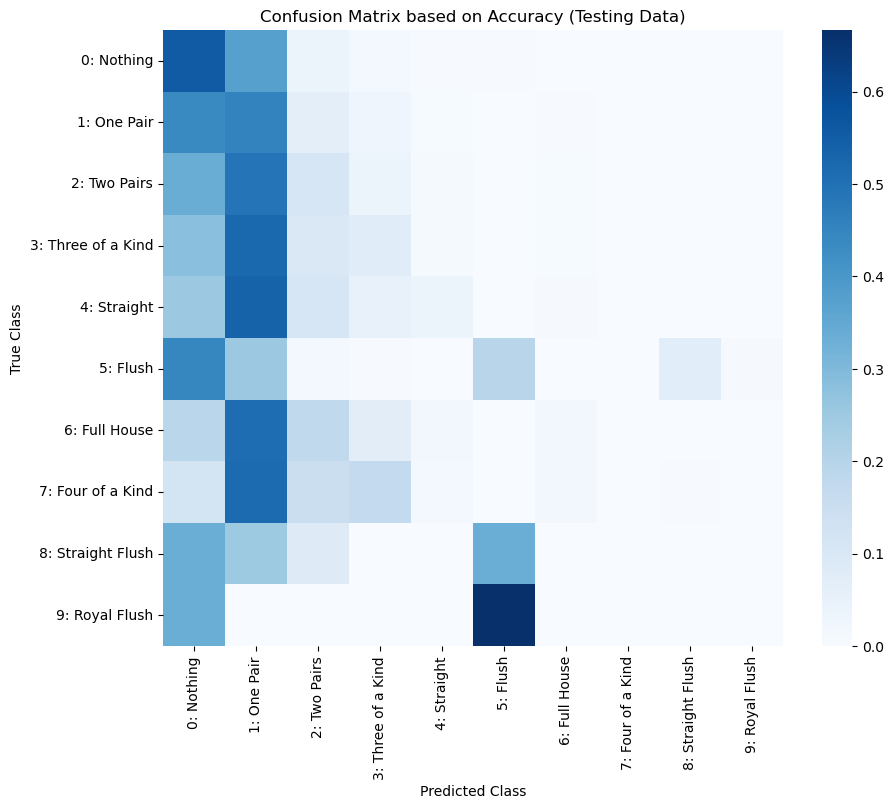

In [135]:
# Initialize the Decision Tree classifier with default parameters
classifier_Default_DT_Test = DecisionTreeClassifier(max_depth=None, min_samples_split=2, 
                                                    min_samples_leaf=1, criterion='gini')

# Train the classifier
classifier_Default_DT_Test.fit(X_training, y_training)

# Predict on the test data
y_pred_default_test_DT = classifier_Default_DT_Test.predict(X_testing)

# Generate classification report
report_default_DT_test = classification_report(y_testing, y_pred_default_test_DT, zero_division = 0)
print(report_default_DT_test)

# Calculate the number of samples per class in the training dataset
class_counts = y_training.value_counts().sort_index()

# Create the confusion matrix
conf_matrix_default_test_DT = confusion_matrix(y_testing, y_pred_default_test_DT)

# Calculate accuracy for each class
class_accuracy = {}
for class_label in class_counts.index.tolist():
    y_default_testing_true_class = y_testing[y_testing == class_label]
    y_pred_default_test_DT_class = y_pred_default_test_DT[y_testing == class_label]
    if len(y_default_testing_true_class) > 0:
        class_accuracy[class_label] = accuracy_score(y_default_testing_true_class, y_pred_default_test_DT_class)
    else:
        class_accuracy[class_label] = 0.0

# Normalize the confusion matrices
norm_conf_matrix_default_test_DT = normalize(conf_matrix_default_test_DT, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_default_test_DT, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Testing Data)')
plt.show()

#### intial parameters

                    precision    recall  f1-score   support

0: Nothing in hand       0.60      0.28      0.39    501209
       1: One pair       0.50      0.09      0.15    422498
      2: Two pairs       0.08      0.14      0.10     47622
3: Three of a kind       0.03      0.26      0.06     21121
       4: Straight       0.01      0.29      0.01      3885
          5: Flush       0.01      0.55      0.02      1996
     6: Full house       0.00      0.13      0.00      1424
 7: Four of a kind       0.00      0.01      0.00       230
 8: Straight flush       0.00      0.17      0.00        12
    9: Royal flush       0.00      0.00      0.00         3

          accuracy                           0.19   1000000
         macro avg       0.12      0.19      0.07   1000000
      weighted avg       0.52      0.19      0.26   1000000



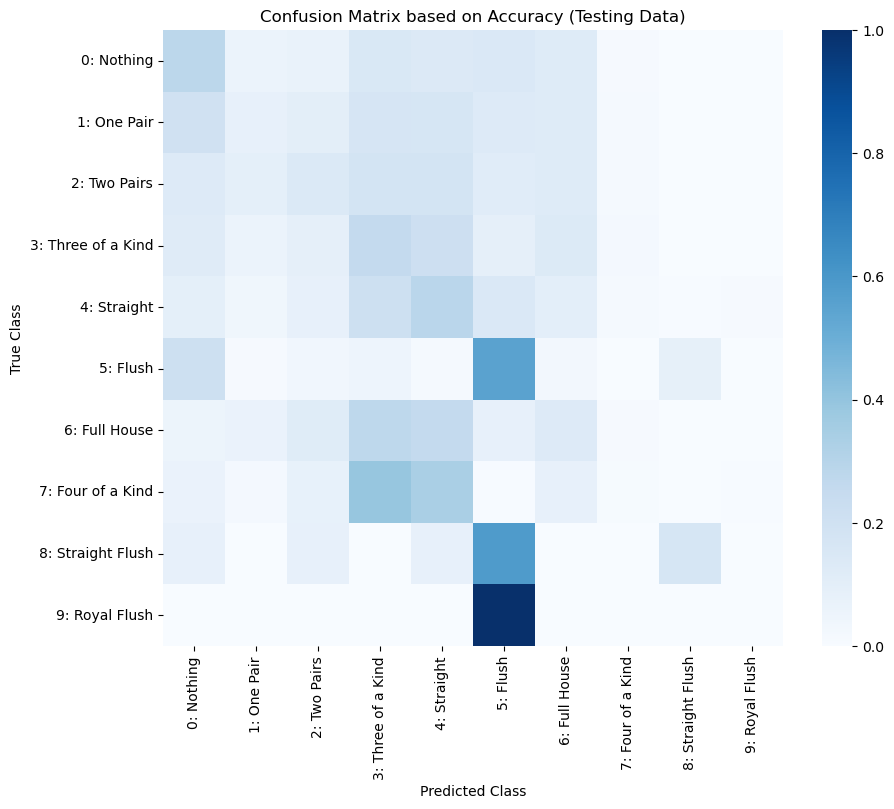

In [133]:
# Initialize the Decision Tree classifier with intial parameters
classifier_spec_DT_Test = DecisionTreeClassifier(max_depth=10, min_samples_split=3, 
                                                 min_samples_leaf=3, class_weight='balanced', 
                                                 criterion='gini')

# Train the classifier
classifier_spec_DT_Test.fit(X_training, y_training)

# Predict on the test data
y_pred_spec_test_DT = classifier_spec_DT_Test.predict(X_testing)

# Generate classification report
report_spec_DT_test = classification_report(y_testing, y_pred_spec_test_DT, zero_division = 0)
print(report_spec_DT_test)


# Calculate the number of samples per class in the training dataset
class_counts = y_training.value_counts().sort_index()

# Create the confusion matrix
conf_matrix_test_spec_DT = confusion_matrix(y_testing, y_pred_spec_test_DT)

# Calculate accuracy for each class
class_accuracy = {}
for class_label in class_counts.index.tolist():
    y_testing_true_class = y_testing[y_testing == class_label]
    y_pred_spec_test_DT_class = y_pred_spec_test_DT[y_testing == class_label]
    if len(y_testing_true_class) > 0:
        class_accuracy[class_label] = accuracy_score(y_testing_true_class, y_pred_spec_test_DT_class)
    else:
        class_accuracy[class_label] = 0.0

# Normalize the confusion matrices
norm_conf_matrix_test_spec_DT = normalize(conf_matrix_test_spec_DT, axis=1, norm='l1')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix_test_spec_DT, annot=False, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix based on Accuracy (Testing Data)')
plt.show()

### Model complexity for DT

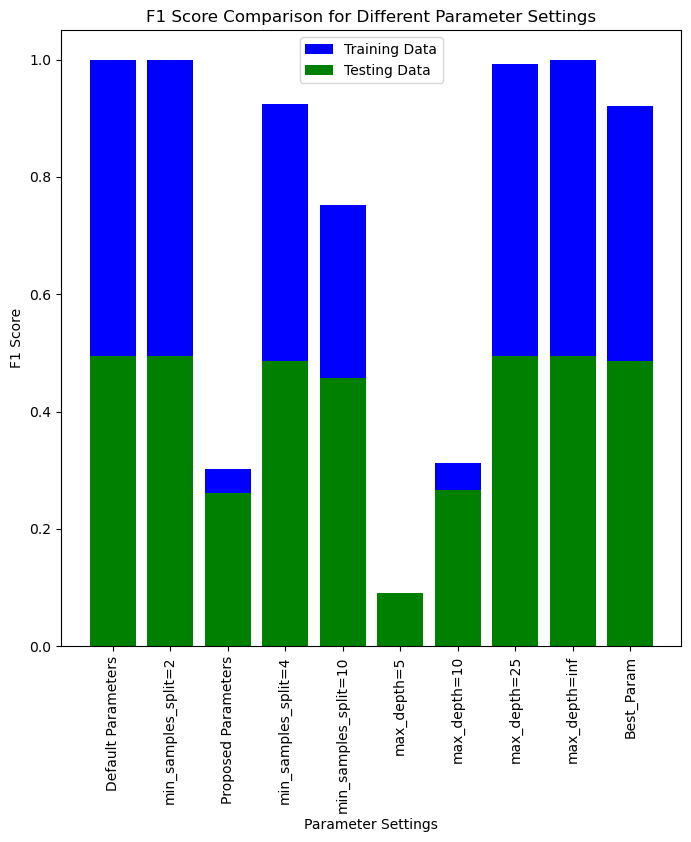

Best Parameter Setting:  Default Parameters


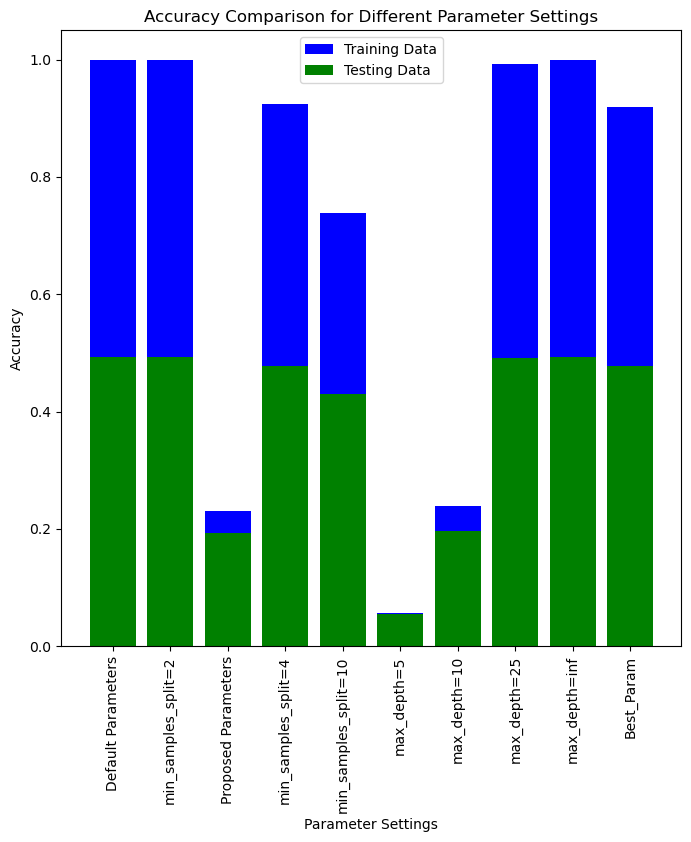

In [143]:
from sklearn.metrics import f1_score
# Define the parameter settings for comparison
parameters = [
    ("Default Parameters", DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                                  class_weight='balanced', criterion='gini')),
    ("min_samples_split=2", DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                                  class_weight='balanced', criterion='gini')),
    ("Proposed Parameters", DecisionTreeClassifier(max_depth=10, min_samples_split=3, min_samples_leaf=3,
                                                   class_weight='balanced', criterion='gini')),
    ("min_samples_split=4", DecisionTreeClassifier(max_depth=None, min_samples_split=4, min_samples_leaf=1,
                                                   class_weight='balanced', criterion='gini')),
    ("min_samples_split=10", DecisionTreeClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=1,
                                                    class_weight='balanced', criterion='gini')),
    ("max_depth=5", DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1,
                                           class_weight='balanced', criterion='gini')),
    ("max_depth=10", DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1,
                                            class_weight='balanced', criterion='gini')),
    ("max_depth=25", DecisionTreeClassifier(max_depth=25, min_samples_split=2, min_samples_leaf=1,
                                            class_weight='balanced', criterion='gini')),
    ("max_depth=inf", DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                             class_weight='balanced', criterion='gini')),
    ("Best_Param", DecisionTreeClassifier(max_depth=25, min_samples_split=4, min_samples_leaf=1,
                                                   class_weight='balanced', criterion='gini')),
]

f1_scores_train = []
f1_scores_test = []
accuracies_train = []
accuracies_test = []

# Evaluate the parameter settings
for param_name, classifier in parameters:
    # Train the classifier
    classifier.fit(X_training, y_training)

    # Predict on the training data
    y_pred_train_DT_params = classifier.predict(X_training)

    # Predict on the testing data
    y_pred_test_DT_params = classifier.predict(X_testing)

    # Calculate the F1 score and accuracy for training data
    f1_training_DT_params = f1_score(y_training, y_pred_train_DT_params, average='weighted')
    accuracy_train_DT_params = accuracy_score(y_training, y_pred_train_DT_params)

    # Calculate the F1 score and accuracy for testing data
    f1_testing_DT_params = f1_score(y_testing, y_pred_test_DT_params, average='weighted')
    accuracy_test_DT_params = accuracy_score(y_testing, y_pred_test_DT_params)

    f1_scores_train.append(f1_training_DT_params)
    f1_scores_test.append(f1_testing_DT_params)
    accuracies_train.append(accuracy_train_DT_params)
    accuracies_test.append(accuracy_test_DT_params)

# Prepare the parameter names for plotting
param_names = [param_name for param_name, _ in parameters]

# Find the best parameter setting based on the maximum F1 score for testing data
best_param_index = f1_scores_test.index(max(f1_scores_test))
best_param_name = param_names[best_param_index]

# Add the best parameter setting to the parameter list
parameters.append(("Best Parameter", parameters[best_param_index][1]))

# Plot the F1 scores for training and testing data
plt.figure(figsize=(8,8))
plt.bar(param_names, f1_scores_train, color='blue', label='Training Data')
plt.bar(param_names, f1_scores_test, color='green', label='Testing Data')
plt.xlabel('Parameter Settings')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison for Different Parameter Settings')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Print the best parameter setting based on the maximum F1 score for testing data
print("Best Parameter Setting: ", best_param_name)

# Plot the accuracies for training and testing data
plt.figure(figsize=(8, 8))
plt.bar(param_names, accuracies_train, color='blue', label='Training Data')
plt.bar(param_names, accuracies_test, color='green', label='Testing Data')
plt.xlabel('Parameter Settings')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Parameter Settings')
plt.legend()
plt.xticks(rotation=90)
plt.show()


### Learning Curve

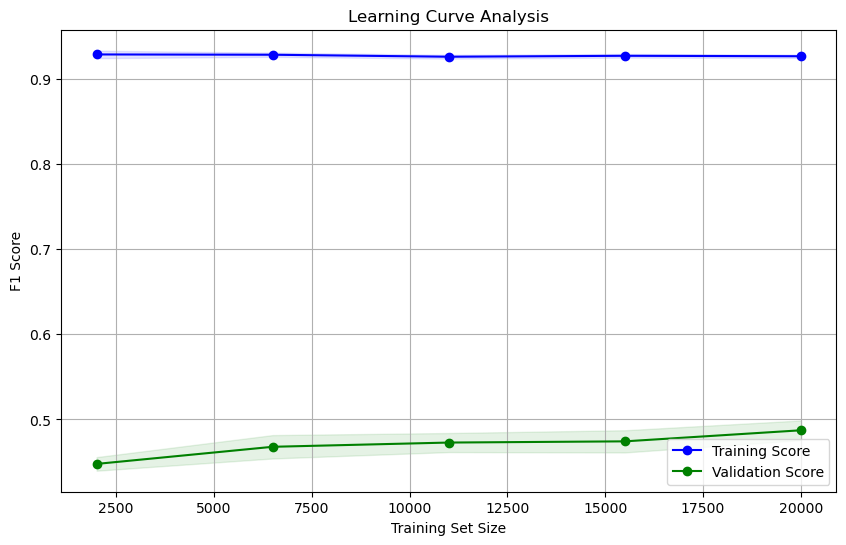

In [170]:
from sklearn.model_selection import StratifiedKFold, learning_curve
# Define the parameter settings
classifier_best_param_DT = DecisionTreeClassifier(max_depth=25, min_samples_split=4, min_samples_leaf=1,
                                    class_weight='balanced', criterion='gini')

# Define the cross-validation folds
cross_validation_DT = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, val_scores = learning_curve(classifier_best_param_DT, X_training, 
                                                       y_training, cv=cross_validation_DT, 
                                                       scoring='f1_weighted',
                                                       train_sizes=[0.1, 0.325, 0.55, 0.775, 1.0], n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve Analysis')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Confusion Matrix for the Transformed Data

                    precision    recall  f1-score   support

0: Nothing in hand       1.00      1.00      1.00    501209
       1: One pair       1.00      1.00      1.00    422498
      2: Two pairs       0.99      1.00      0.99     47622
3: Three of a kind       0.97      1.00      0.98     21121
       4: Straight       1.00      1.00      1.00      3885
          5: Flush       1.00      0.76      0.86      1996
     6: Full house       0.72      0.21      0.32      1424
 7: Four of a kind       1.00      0.40      0.57       230
 8: Straight flush       0.02      0.25      0.03        12
    9: Royal flush       0.01      1.00      0.02         3

          accuracy                           1.00   1000000
         macro avg       0.77      0.76      0.68   1000000
      weighted avg       1.00      1.00      1.00   1000000



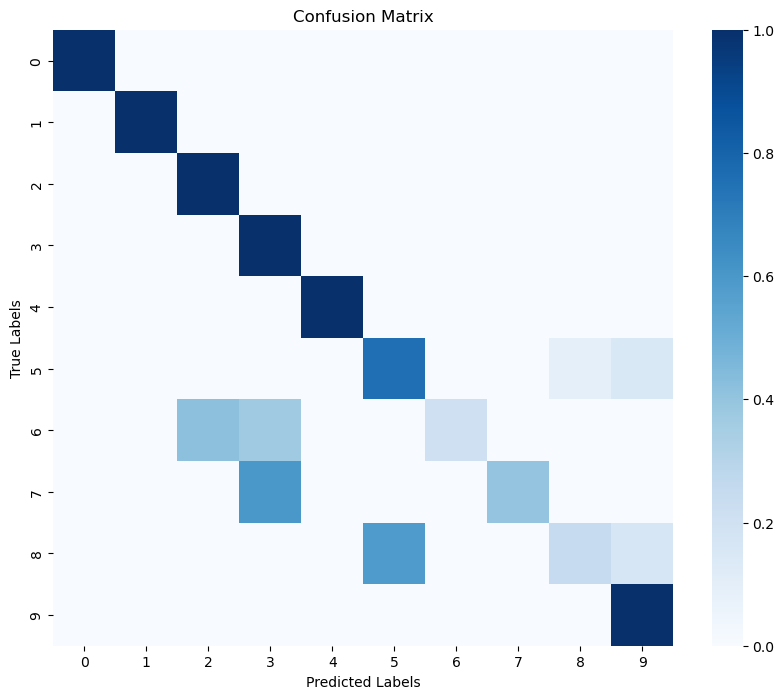

In [149]:
# Initialize the Decision Tree classifier
classifier_TF_train_DT = DecisionTreeClassifier()

# Fit the classifier on the training data
classifier_TF_train_DT.fit(X_transformed_training, y_transformed_training)

# Predict on the test data
y_pred_default_transformed_train = classifier_TF_train_DT.predict(X_transformed_testing)

# Generate the classification report
classification_rep_DT_default_trans = classification_report(y_transformed_testing, 
                                                            y_pred_default_transformed_train)
print(classification_rep_DT_default_trans)

# Generate the confusion matrix
confusion_mat_DT_default_train_trans = confusion_matrix(y_transformed_testing, y_pred_default_transformed_train)

# Normalize the confusion matrices
norm_confusion_mat_DT_default_train_trans = normalize(confusion_mat_DT_default_train_trans, axis=1, norm='l1')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(norm_confusion_mat_DT_default_train_trans, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()